Анализ данных

Мы проводим анализ данных на предмет целостности и полноты данных и оцениваем выбросы и аномалии нашего датасета

In [75]:
# Загрузка нужных библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка данных

Выгружаем данные и выводим первые 5 строк

In [76]:
FILE_ID = "1QFRLAvsex4Q3-g4SutvEHG2AA2lTYfv8"
URL = f"https://drive.google.com/uc?id={FILE_ID}"
raw_data = pd.read_csv(URL ,sep=';', encoding='utf-8-sig')

# Просмотр первых строк
print("Первые 5 строк данных:")
print(raw_data.head(5))

Первые 5 строк данных:
   Number      ID Chemical compound               Name of compound  \
0    5903  192631       Na1.44Ge136  Sodium germanium (1.44/136).    
1    8210  423734            Ba2Ni3        Dibarium trinickelide.    
2    4441  106482              CoMg       Cobalt magnesium (1/1).    
3    1292   58646              BaCu          Barium copper (1/1).    
4    7530  247133              SrCu       Strontium copper (1/1).    

                                             Authors  \
0  Boehme Bodo,Reibold Marianne,Auffermann Gudrun...   
1  Hoehn P.,Burkhardt U.,Hoffmann S.,Jach F.,Knie...   
2          Yoshida M.,Bonhomme F.,Yvon K.,Fischer P.   
3                    Fornasini Maria L.,Merlo Franco   
4                            Merlo F.,Fornasini M.L.   

                                          Literature Symmetry Type  \
0  Zeitschrift fuer Kristallographie - Crystallin...    Fd-3m   3D   
1  Zeitschrift fuer Anorganische und Allgemeine C...    P-3m1   3D   
2        

Проверка данных на пропуски и счет процента пропусков

In [77]:
print(raw_data.isnull().sum()) # проверка пропусков

print("\nПроцент пропусков") # Процент пропусков по столбцам после обработки
print(raw_data.isnull().mean() * 100)

Number                  0
ID                      0
Chemical compound       0
Name of compound        0
Authors                 0
Literature              0
Symmetry                0
Type                    0
Topology                0
G3                      0
Number of atoms         0
Unnamed: 11          7444
Unnamed: 12          7444
Unnamed: 13          7444
Unnamed: 14          7222
dtype: int64

Процент пропусков
Number                 0.000000
ID                     0.000000
Chemical compound      0.000000
Name of compound       0.000000
Authors                0.000000
Literature             0.000000
Symmetry               0.000000
Type                   0.000000
Topology               0.000000
G3                     0.000000
Number of atoms        0.000000
Unnamed: 11          100.000000
Unnamed: 12          100.000000
Unnamed: 13          100.000000
Unnamed: 14           97.017732
dtype: float64


График Completness, нужное значение минимум 0,98 включительно

C:\Users\user\AppData\Local\Temp\ipykernel_8856\1762950686.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




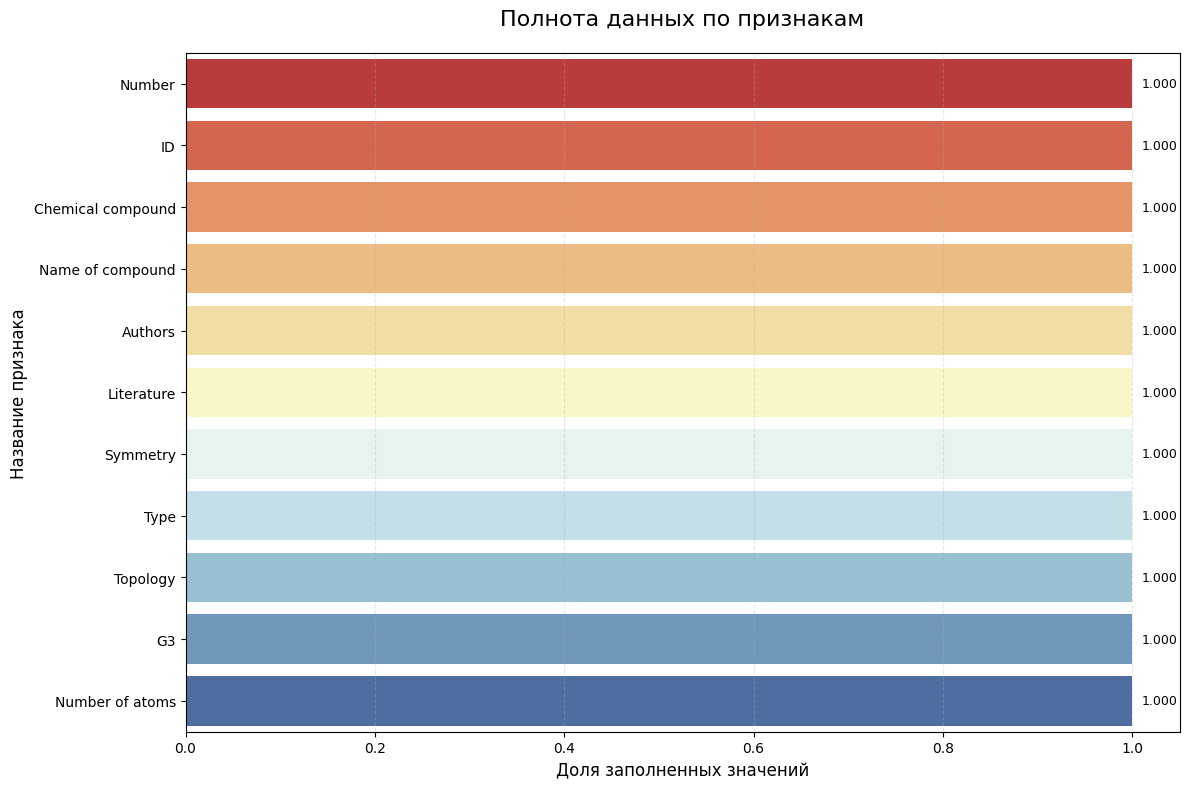

Среднее значение полноты данных: 1.000
Лучшие признаки (полнота = 1.000):
   ✓ Number
   ✓ ID
   ✓ Chemical compound
   ✓ Name of compound
   ✓ Authors
   ✓ Literature
   ✓ Symmetry
   ✓ Type
   ✓ Topology
   ✓ G3
   ✓ Number of atoms

Признаки, где есть пропуски:


In [ ]:
df = pd.read_csv('dataset.csv', delimiter=';', encoding='utf-8')
completeness = (1 - df.isnull().mean()).sort_values()
completeness_df = completeness.reset_index()
completeness_df.columns = ['Признак', 'Полнота']
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=completeness_df,
    x='Полнота', 
    y='Признак',
    palette='viridis'
)
plt.title('Полнота данных по признакам', fontsize=16, pad=20)
plt.xlabel('Доля заполненных значений', fontsize=12)
plt.ylabel('Название признака', fontsize=12)
for i, (index, row) in enumerate(completeness_df.iterrows()):
    ax.text(row['Полнота'] + 0.01, i, f'{row["Полнота"]:.3f}', 
            va='center', fontsize=9)

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()
avg_completeness = completeness.mean()
print(f"Среднее значение полноты данных: {avg_completeness:.3f}")
print(f"Лучшие признаки (полнота = 1.000):")
for col in completeness[completeness == 1.0].index:
    print(f"   ✓ {col}")

print(f"\nПризнаки, где есть пропуски:")
for col, comp in completeness[completeness < 1.0].items():
    print(f"   ⚠ {col}: {comp:.3f}")


Анализ показал, что наши данные полные на все 100%. Эталонное значение 0.98 соблюдается.

Далее проводится анализ на уникальность наших данных.

In [79]:
duplicate_count = df.duplicated().sum()
total_rows = len(df)
uniqueness_score = 1 - (duplicate_count / total_rows)

print("Анализ дублей")
print("=" * 25)
print(f"Всего строк: {total_rows}")
print(f"Дубликатов: {duplicate_count}")
print(f"Оценка уникальности: {uniqueness_score:.3f}")

# Дополнительная статистика
print(f"Уникальных строк: {total_rows - duplicate_count}")
print(f"Процент дубликатов: {(duplicate_count/total_rows)*100:.2f}%")

if duplicate_count > 0:
    print(f"\nПримеры дублирующихся строк ({duplicate_count} найдено):")
    duplicates = df[df.duplicated(keep=False)]
    display(duplicates.head())
    
    if duplicate_count > total_rows * 0.1:
        print("Рекомендация: рекомендуется удалить дубликаты!")
    else:
        print("Рекомендация: небольшое количество дубликатов")
else:
    print("Дубликаты не обнаружены!")

# Быстрый анализ по столбцам
print("\nУникальность по столбцам:")
for col in df.columns:
    unique_pct = df[col].nunique() / total_rows * 100
    print(f"  {col}: {unique_pct:.1f}% уникальных значений")

Анализ дублей
Всего строк: 7444
Дубликатов: 0
Оценка уникальности: 1.000
Уникальных строк: 7444
Процент дубликатов: 0.00%
Дубликаты не обнаружены!

Уникальность по столбцам:
  Number: 100.0% уникальных значений
  ID: 100.0% уникальных значений
  Chemical compound: 90.0% уникальных значений
  Name of compound: 92.6% уникальных значений
  Authors: 40.2% уникальных значений
  Literature: 48.0% уникальных значений
  Symmetry: 2.5% уникальных значений
  Type: 0.0% уникальных значений
  Topology: 12.3% уникальных значений
  G3: 58.6% уникальных значений
  Number of atoms: 0.8% уникальных значений


Проверка показала, что полностью уникальны два критерия - ID и Number.Остальные имеют повторяющиесяя значения, но так как датасет имеет химические и кристаллографические данные это нормально. Много соединений имеют схожие топологии (Topology), значений равномерности структуры (G3), симметрии кристаллов (Symmetry) и количество атомов (Number of atoms). Поэтому данные пригодны для дальнейшего анализа.

Теперь проверим долю аномалий в числах

Топ-10 колонок с выбросами:
                 outlier_ratio
Number of atoms       0.065422
Number                0.000000
ID                    0.000000


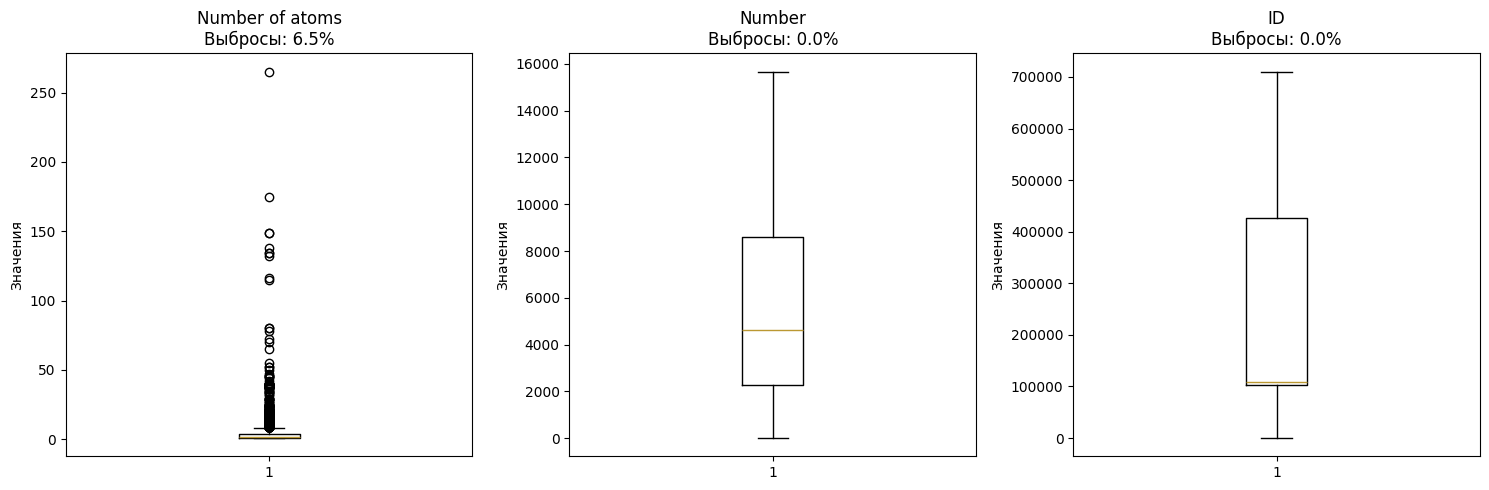

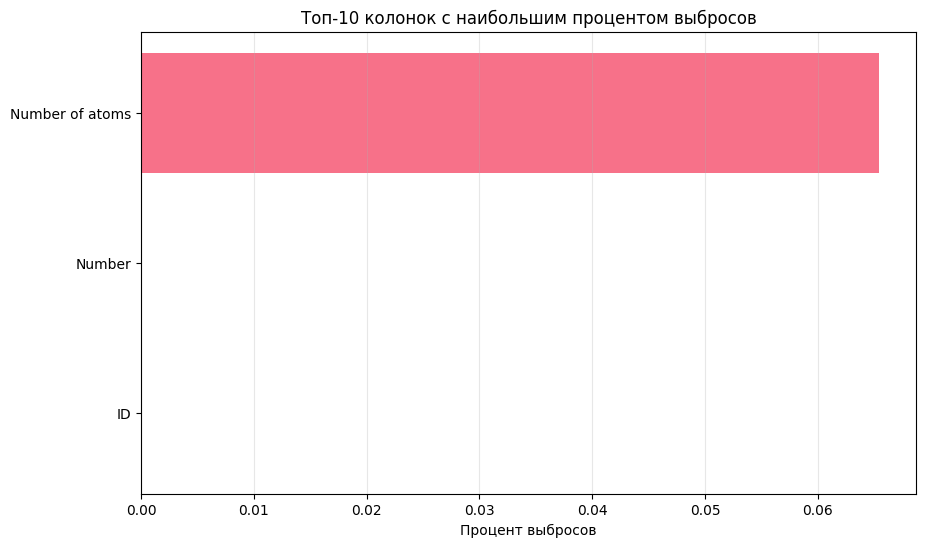

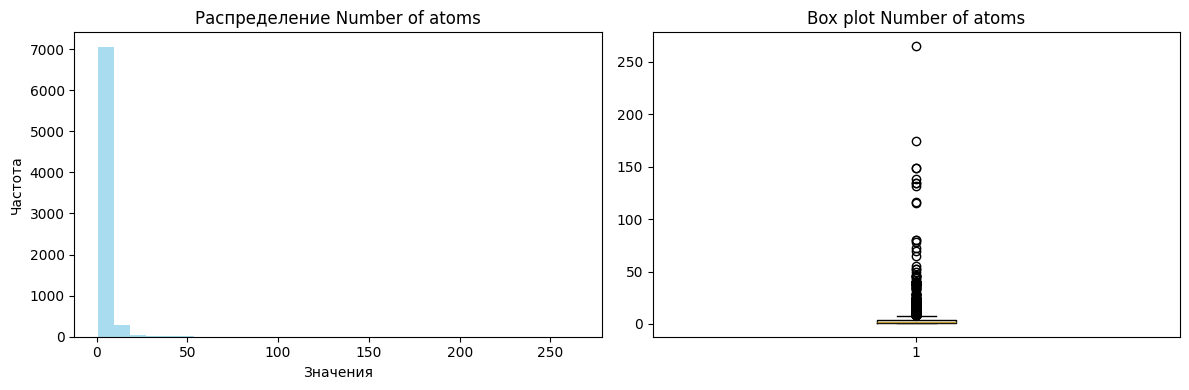

In [ ]:
df = pd.read_csv('dataset.csv', delimiter=';')

# Анализ выбросов
numeric_df = df.select_dtypes(include=[np.number])
outlier_ratio = {}

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = ((numeric_df[col] < lower) | (numeric_df[col] > upper)).sum()
    outlier_ratio[col] = outliers / len(df)

outlier_df = pd.DataFrame.from_dict(outlier_ratio, orient='index', 
                                  columns=['outlier_ratio']).sort_values('outlier_ratio', ascending=False)

print("Топ-10 колонок с выбросами:")
print(outlier_df.head(10))

top_columns = outlier_df.head(3).index

plt.figure(figsize=(15, 5))

for i, col in enumerate(top_columns, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(numeric_df[col].dropna())
    plt.title(f'{col}\nВыбросы: {outlier_df.loc[col, "outlier_ratio"]:.1%}')
    plt.ylabel('Значения')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6)) #Столбчатая диаграмма процента выбросов
top_10 = outlier_df.head(10)
plt.barh(range(len(top_10)), top_10['outlier_ratio'])
plt.yticks(range(len(top_10)), top_10.index)
plt.xlabel('Процент выбросов')
plt.title('Топ-10 колонок с наибольшим процентом выбросов')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.show()

if len(outlier_df) > 0: #Распределение значений для колонки с наибольшими выбросами
    top_col = outlier_df.index[0]
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(numeric_df[top_col].dropna(), bins=30, alpha=0.7, color='viridis')
    plt.title(f'Распределение {top_col}')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(numeric_df[top_col].dropna())
    plt.title(f'Box plot {top_col}')
    
    plt.tight_layout()
    plt.show()


Как видно из графиков больше всего выбросов в колонке количество атомов (Number of atoms) - 0,065, что больше чем эталон 0,02. Они отражают сходства между соединениями.


АНАЛИЗ ПУБЛИКАЦИЙ ПО ГОДАМ


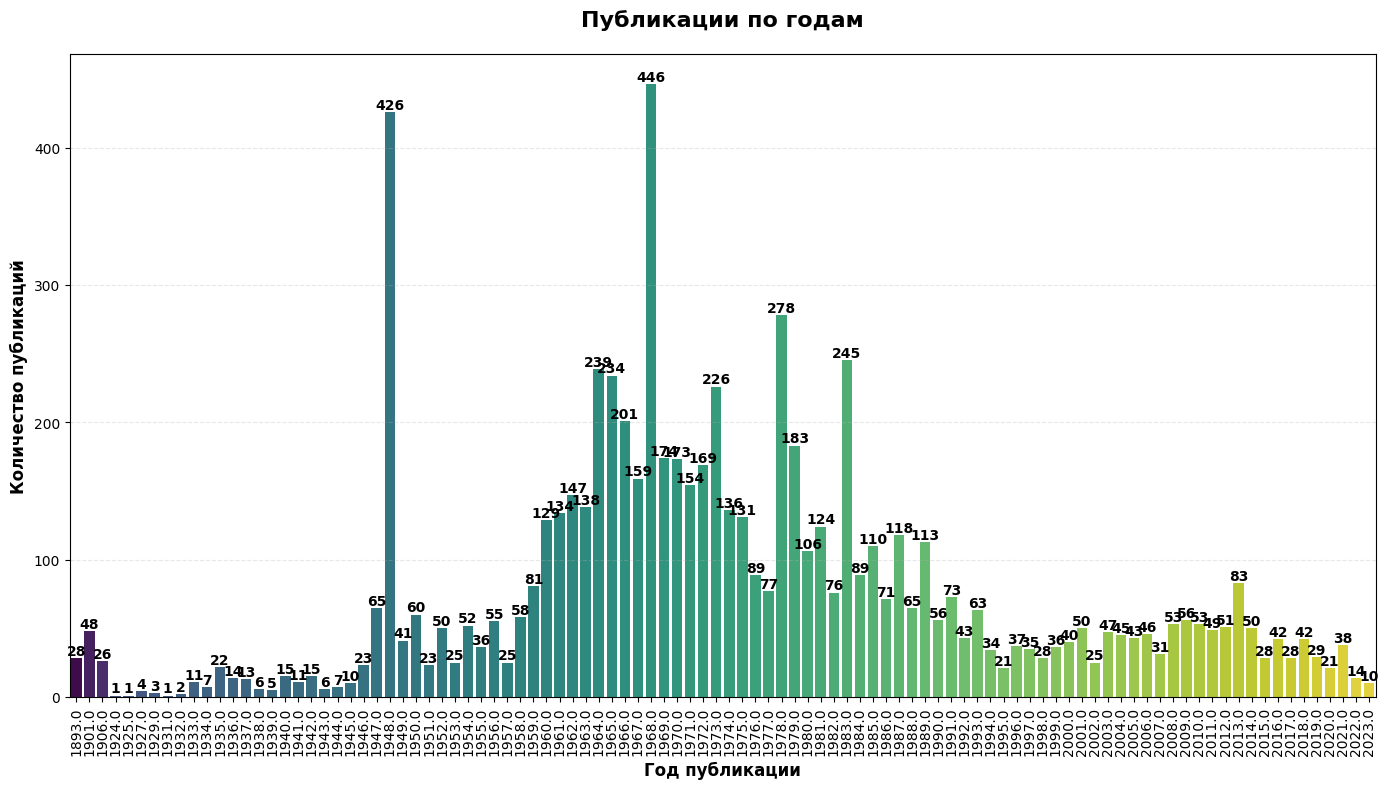

In [81]:
print("\nАНАЛИЗ ПУБЛИКАЦИЙ ПО ГОДАМ")
df['Year'] = df['Literature'].str.extract(r'(\d{4})').astype(float)

plt.style.use('default')
sns.set_palette("viridis")

plt.figure(figsize=(14, 8))

year_counts = df['Year'].value_counts().sort_index()


year_df = year_counts.reset_index()
year_df.columns = ['Year', 'Count']

ax = sns.barplot(data=year_df, x='Year', y='Count',  # Построение графика
                 hue='Year', legend=False, palette='viridis')

for i, (year, count) in enumerate(zip(year_df['Year'], year_df['Count'])):
    ax.text(i, count + 0.1, f'{int(count)}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.title('Публикации по годам', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Год публикации', fontsize=12, fontweight='bold')
plt.ylabel('Количество публикаций', fontsize=12, fontweight='bold')

plt.xticks(rotation=90) 

plt.grid(axis='y', alpha=0.3, linestyle='--') # Сетка

plt.tight_layout()

plt.show()



Диаграмма показывает нам количество публикаций, объектом исследований которых являются интерметаллиды, в разные годы. Как можно заметить интенсивное изучение этих соединений началось после второй мировой войны и это логично, так как интерметаллиды - соединения состоящие из 2 и более металлов, а промышленности необходимы такие материалы с различными хорошими свойствами, например: тугоплавкость и лёгкость. В современном мире известно уже более 40000 различных структур, следовательно интерес ученых теряется к данному классу соединений. 
Видно, что в 1948 и 1968 годах вышло просто невероятное количество публикаций, но это объяснимо. Дело в том, что в 1948 году человечество изобрело транзистор, который работал благодаря интерметаллидам! 
В 1968 году такому всплеску поспособстовало несколько причин: 1. Были открыты интерметллические суперпроводники, научный прорыв 2.Расцвет электроники 3.Учёный Юма-Розери представил миру работающий метод прогнозирования структур  и 4. Сильное внимание привлекли магнитные материалы.

C:\Users\user\AppData\Local\Temp\ipykernel_8856\3177259655.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




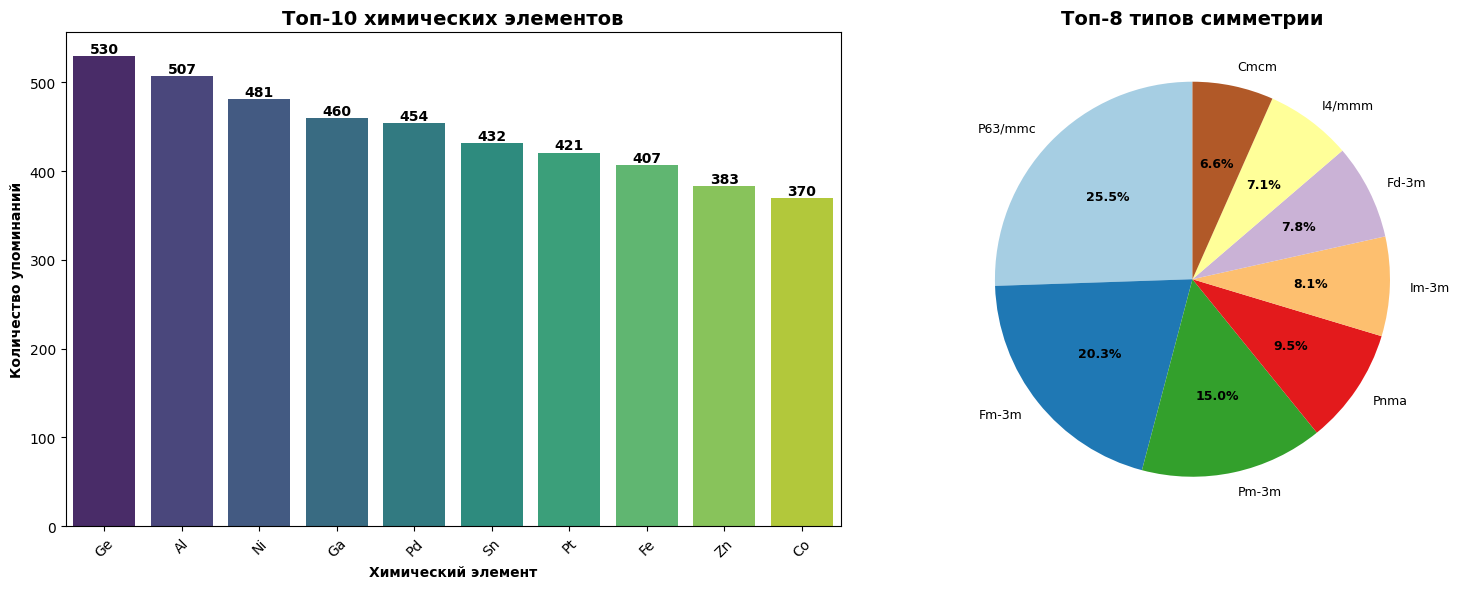

Всего уникальных химических элементов: 73
Всего типов симметрии: 186


In [82]:
# Визуализации
plt.style.use('default')
sns.set_palette("husl")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Топ химических элементов
top_elements = df['Chemical compound'].str.extractall(r'([A-Z][a-z]*)')[0].value_counts().head(10)

elements_df = top_elements.reset_index()
elements_df.columns = ['Element', 'Count']

# Столбчатая диаграмма 
sns.barplot(data=elements_df, x='Element', y='Count', ax=axes[0], palette='viridis')
axes[0].set_title('Топ-10 химических элементов', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Химический элемент', fontweight='bold')
axes[0].set_ylabel('Количество упоминаний', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Добавляем значения на столбцы
for i, count in enumerate(elements_df['Count']):
    axes[0].text(i, count + 0.1, f'{count}', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)

# Распределение типов симметрии
top_symmetry = df['Symmetry'].value_counts().head(8)

# Круговая диаграмма
colors = plt.cm.Paired(np.linspace(0, 1, len(top_symmetry)))
wedges, texts, autotexts = axes[1].pie(top_symmetry.values, 
                                      labels=top_symmetry.index, 
                                      autopct='%1.1f%%', 
                                      startangle=90,
                                      colors=colors,
                                      textprops={'fontsize': 9})

axes[1].set_title('Топ-8 типов симметрии', fontsize=14, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Выводим дополнительную информацию
print(f"Всего уникальных химических элементов: {df['Chemical compound'].str.extractall(r'([A-Z][a-z]*)')[0].nunique()}")
print(f"Всего типов симметрии: {df['Symmetry'].nunique()}")

АНАЛИЗ ХИМИЧЕСКИХ ЭЛЕМЕНТОВ

Первым по распространенности оказался германий (Ge) ведь именно он и применялся раньше в транзисторах, о которых я говорил выше.
Далее идут алюминий (Al) и палладий (Pd), их используют в промышленности, алюминий легкий и плотный, а палладий тугоплавкий.
Никель (Ni), железо (Fe) и Кобальт (Co) обладают магнитными свойствами (А еще без железа мы сейчас вообще никуда)

73 из 83 металлов применяются для синтеза интерметаллидов (кроме фонящих радиацией, их как раз около 10)

ТИПЫ СИММЕТРИИ

В большинстве случаев соединения нескольких металлов перенимают тип симметрии какого-то одного из металлов, который есть в составе.
Симметрией Fm-3m обладает алюминий, платина, никель и т.д
Pm-3m - железо, вольфрам, литий, натрий и т.д
P63/mmc - кобальт, цинк, магний и т.д

Другие виды являются подвидами других симметрий

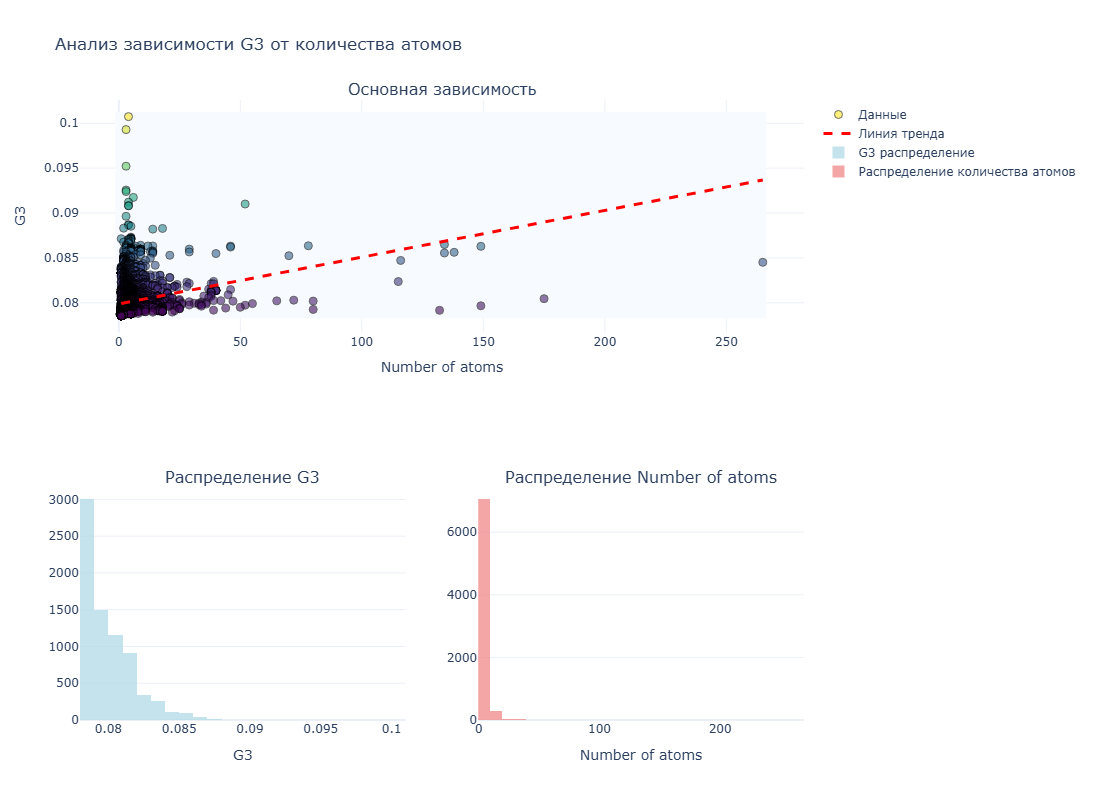

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Подготовка данных
df['G3'] = df['G3'].str.replace(',', '.').astype(float)
df['Number of atoms'] = pd.to_numeric(df['Number of atoms'], errors='coerce')
clean_df = df[['G3', 'Number of atoms']].dropna()

# Создаем  интерактивную визуализацию
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        'Основная зависимость',
        'Распределение G3',
        'Распределение Number of atoms',
        '2D плотность'
    ],
    specs=[
        [{"type": "scatter", "rowspan": 1, "colspan": 2}, None],
        [{"type": "histogram"}, {"type": "histogram"}]
    ]
)

# Основной scatter plot
fig.add_trace(
    go.Scatter(
        x=clean_df['Number of atoms'],
        y=clean_df['G3'],
        mode='markers',
        name='Данные',
        marker=dict(
            color=clean_df['G3'],
            colorscale='Viridis',
            size=8,
            opacity=0.6,
            line=dict(width=1, color='black')
        ),
        hovertemplate=(
            "Атомы: %{x}<br>" +
            "G3: %{y:.4f}<br>" +
            "<extra></extra>"
        )
    ),
    row=1, col=1
)

# линия тренда
z = np.polyfit(clean_df['Number of atoms'], clean_df['G3'], 1)
p = np.poly1d(z)
trend_x = np.linspace(clean_df['Number of atoms'].min(), clean_df['Number of atoms'].max(), 100)
trend_y = p(trend_x)

fig.add_trace(
    go.Scatter(
        x=trend_x,
        y=trend_y,
        mode='lines',
        name='Линия тренда',
        line=dict(color='red', width=3, dash='dash')
    ),
    row=1, col=1
)

# Диаграмма G3
fig.add_trace(
    go.Histogram(
        x=clean_df['G3'],
        name='G3 распределение',
        marker_color='lightblue',
        opacity=0.7,
        nbinsx=30
    ),
    row=2, col=1
)

# Диаграмма Number of atoms
fig.add_trace(
    go.Histogram(
        x=clean_df['Number of atoms'],
        name='Распределение количества атомов',
        marker_color='lightcoral',
        opacity=0.7,
        nbinsx=30
    ),
    row=2, col=2
)

# 4. Диаграмма (плотность)
fig.add_trace(
    go.Histogram2dContour(
        x=clean_df['Number of atoms'],
        y=clean_df['G3'],
        colorscale='Blues',
        showscale=False,
        name='2D плотность'
    ),
    row=1, col=1
)

fig.update_layout(
    height=800,
    title_text="Анализ зависимости G3 от количества атомов",
    showlegend=True,
    template="plotly_white"
)

fig.update_xaxes(title_text="Number of atoms", row=1, col=1)
fig.update_yaxes(title_text="G3", row=1, col=1)
fig.update_xaxes(title_text="G3", row=2, col=1)
fig.update_xaxes(title_text="Number of atoms", row=2, col=2)

fig.show()